# **Task 2: Customer Segmentation Using Unsupervised Learning**

## **Problem Statement and Objective**

The objective is to cluster customers based on spending habits using unsupervised learning and propose tailored marketing strategies. This helps in personalized marketing.

## **Dataset Description and Loading**

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Display info
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## **Data Cleaning and Preprocessing**

 - Drop CustomerID as irrelevant.
 - Encode Gender: Binary (0/1).
 - Scale features for clustering.

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Drop ID
df = df.drop('CustomerID', axis=1)

# Scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## **Exploratory Data Analysis (EDA)**

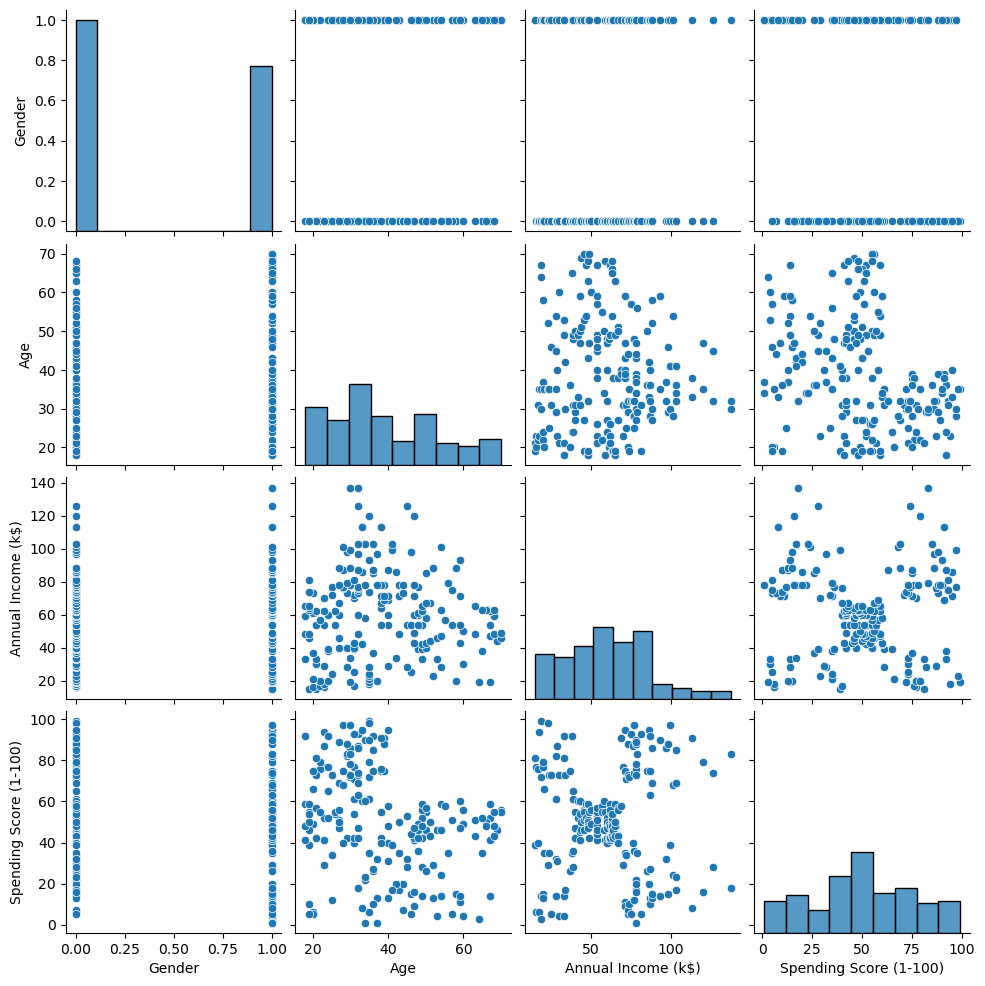

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df)
plt.show()


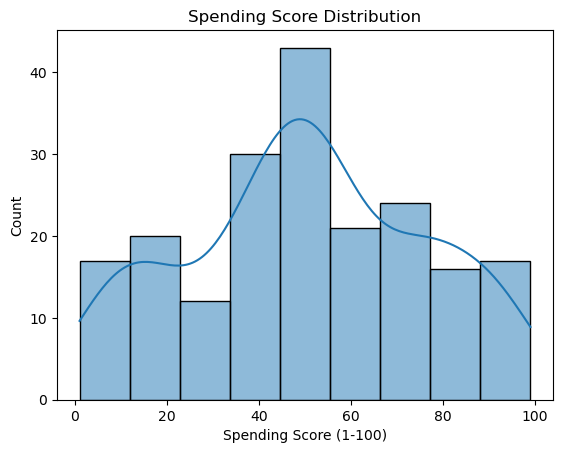

In [7]:
# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()

## **Model Building and Evaluation**

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

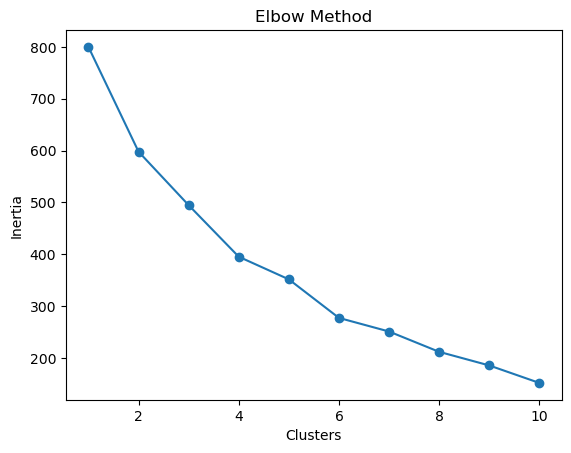

In [8]:
# Apply K-Means, find optimal k using elbow method. Visualize with PCA.

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Elbow method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


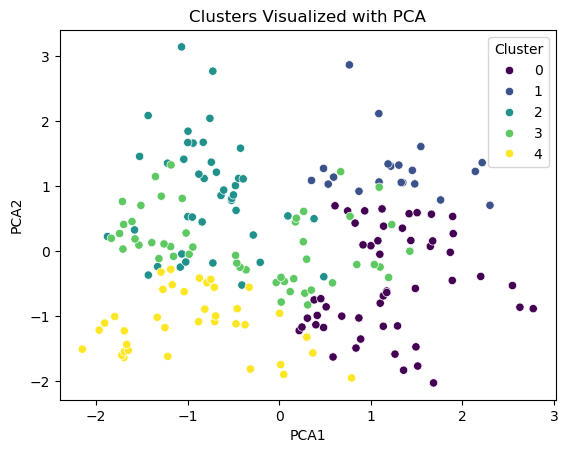

In [9]:
# Optimal k=5
km = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = km.fit_predict(df_scaled)

# PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:,0]
df['PCA2'] = df_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.show()

## **Strategy Development**

 - Cluster 0: High income, low spending - Strategy: Loyalty programs to increase spending.
 - Cluster 1: Medium income, medium spending - Targeted discounts.
 - Cluster 2: High income, high spending - Premium offers.
 - Cluster 3: Low income, high spending - Budget-friendly promotions.
 - Cluster 4: Low income, low spending - Awareness campaigns.

## **Final Conclusion with Insights**

K-Means with 5 clusters segments customers effectively. Insights: Tailor strategies to income-spending patterns for better engagement.